<a href="https://colab.research.google.com/github/abinayavaithi23/roboadvisors/blob/main/Asset_allocation_proper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('ggplot')

In [16]:
#Parameters
semana = 365

In [17]:
data = pd.read_excel('RealestateAllocation.xlsx',sheet_name='Summary',index_col='Date')

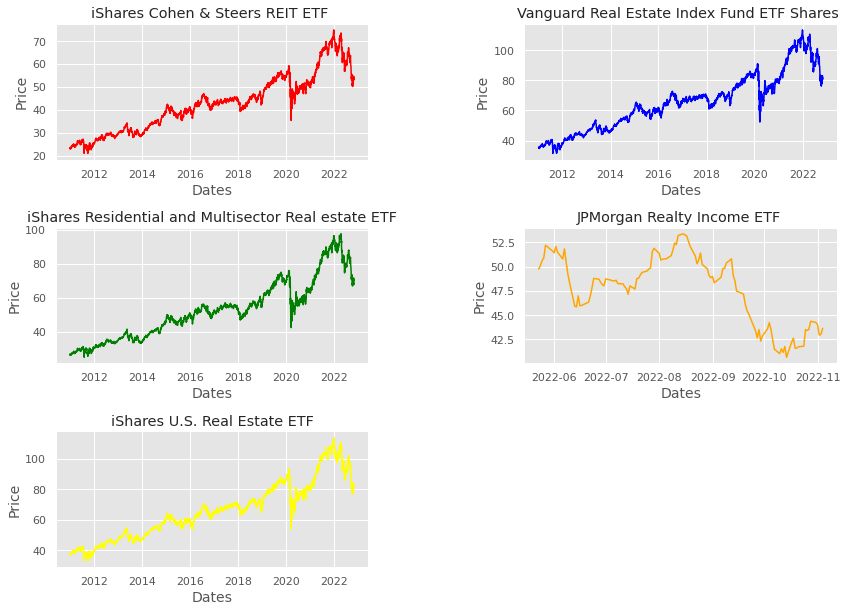

In [18]:
#Historical Evolution
fig1 =plt.figure(figsize=(14,10))
plt.subplots_adjust(hspace=.5,wspace=.5) # it adds space in between plots
plt.subplot(323)
ax = plt.gca()
ax.plot(data['REZ'], color = 'green')
ax.set_xlabel('Dates',fontsize=14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('iShares Residential and Multisector Real estate ETF')

plt.subplot(321)
ax = plt.gca()
ax.plot(data['ICF'], color = 'red')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('iShares Cohen & Steers REIT ETF ')

plt.subplot(322)
ax = plt.gca()
ax.plot(data['VNQ'], color ='blue')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('Vanguard Real Estate Index Fund ETF Shares ')

plt.subplot(324)
ax = plt.gca()
ax.plot(data['JPRE'], color='orange')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('JPMorgan Realty Income ETF ')

plt.subplot(325)
ax = plt.gca()
ax.plot(data['IYR'], color ='yellow')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('iShares U.S. Real Estate ETF')

plt.show();



In [19]:
normalized_series = (data/data.iloc[0])

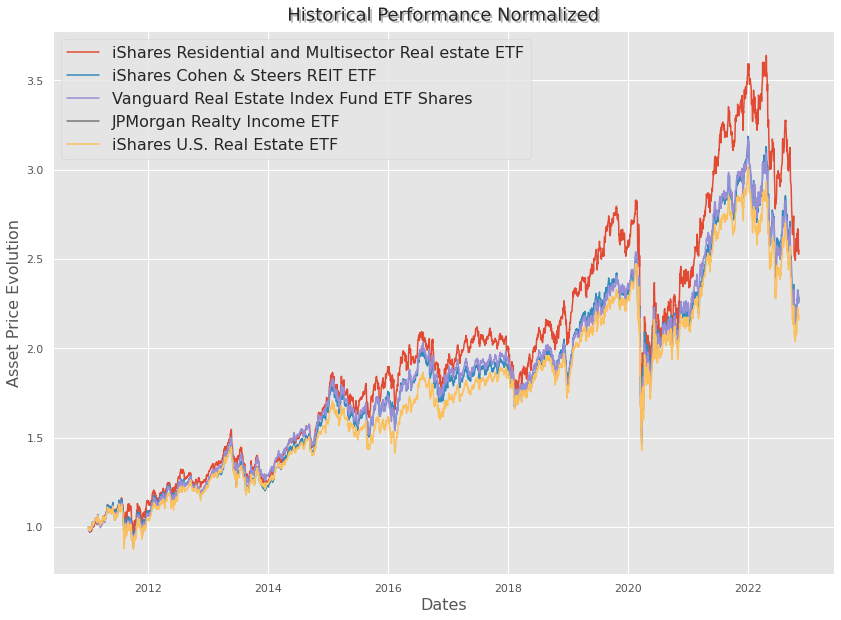

In [20]:
from matplotlib import patheffects
fig2 =plt.figure(figsize=(14,10))
plt.plot(normalized_series)

title_text_obj = plt.title("Historical Performance Normalized", fontsize = 18,
                          verticalalignment = 'bottom')
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
pe = patheffects.withSimplePatchShadow(offset = (1, -1), shadow_rgbFace = (1,0,0),
                                      alpha = 0.8)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)
#('REZ','ICF','VNQ','JPRE','IYR')
plt.legend(('iShares Residential and Multisector Real estate ETF','iShares Cohen & Steers REIT ETF ','Vanguard Real Estate Index Fund ETF Shares','JPMorgan Realty Income ETF ','iShares U.S. Real Estate ETF '),fontsize = 16)
plt.show()

In [21]:
data_returns = np.log(data/data.shift(1))
data_returns.dropna(inplace=True)

In [22]:
stats = pd.DataFrame()
stats['Annualized Returns(%)'] =data_returns.mean() * semana *100
stats['Annualized Volatility(%)'] = data_returns.std() * np.sqrt(semana)*100
stats['Sharpe Ratio'] = stats['Annualized Returns(%)'] /stats['Annualized Volatility(%)']

In [23]:
print(82*'-')
print('Assets Classes Annualized Statistics - full observation period')
stats

----------------------------------------------------------------------------------
Assets Classes Annualized Statistics - full observation period


,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
REZ,-58.513619,29.382234,-1.991463
ICF,-47.326882,30.677259,-1.542735
VNQ,-45.682334,30.689553,-1.488530
JPRE,-41.488093,29.868192,-1.389039
IYR,-43.205167,30.510431,-1.416079
